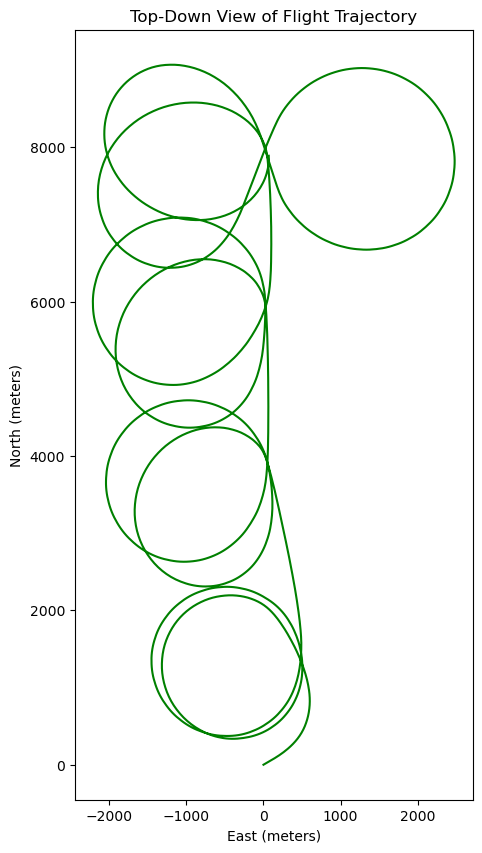

In [23]:
"""
fuction: After transferring *.acmi file into *.txt, LLA2NEU , draw top 2D view and 3D view.
"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to parse data from the file
def parse_data(lines):
    data = []
    for line in lines:
        if line.startswith('A'):
            parts = line.split(',T=')[1].split('|')
            # Assuming the format is longitude, latitude, altitude
            data.append([float(parts[1]), float(parts[0]), float(parts[2])])  # lat, lon, alt
    return pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Altitude'])

# Manual conversion of geodetic to NED coordinates
def manual_geodetic_to_ned(lat, lon, alt, lat_ref, lon_ref, alt_ref):
    # Convert degrees to radians
    lat = np.radians(lat)
    lon = np.radians(lon)
    lat_ref = np.radians(lat_ref)
    lon_ref = np.radians(lon_ref)

    # Differences
    dlat = lat - lat_ref
    dlon = lon - lon_ref

    # Earth's radius and flattening
    a = 6378137.0
    f = 1 / 298.257223563

    # Radius of curvature in the prime vertical
    sin_lat = np.sin(lat_ref)
    N = a / np.sqrt(1 - f * (2 - f) * sin_lat**2)

    # Cartesian offsets
    dNorth = dlat * (a * (1 - f)**2 + alt_ref)
    dEast = dlon * (N + alt_ref) * np.cos(lat_ref)
    dDown = -(alt - alt_ref)

    return dNorth, dEast, dDown

# Reading the file and parsing the data (NOTE: change the suffix .acmi to .txt)
with open('your_file_name.txt', 'r') as file:
    lines = file.readlines()
df = parse_data(lines)

# Applying the manual conversion to NED coordinates
df_ned = df.apply(
    lambda row: manual_geodetic_to_ned(row['Latitude'], row['Longitude'], row['Altitude'], 60, 120, 0),  # NOTE: change center position here
    axis=1, result_type='expand'
)

# Rename columns to North, East, Down
df_ned.columns = ['North', 'East', 'Down']

# Plotting the trajectory
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df_ned['East'], df_ned['North'], color='green')
ax.set_aspect('equal')  # Set the aspect ratio to be equal
ax.set_xlabel('East (meters)')
ax.set_ylabel('North (meters)')
ax.set_title('Top-Down View of Flight Trajectory')
plt.show()


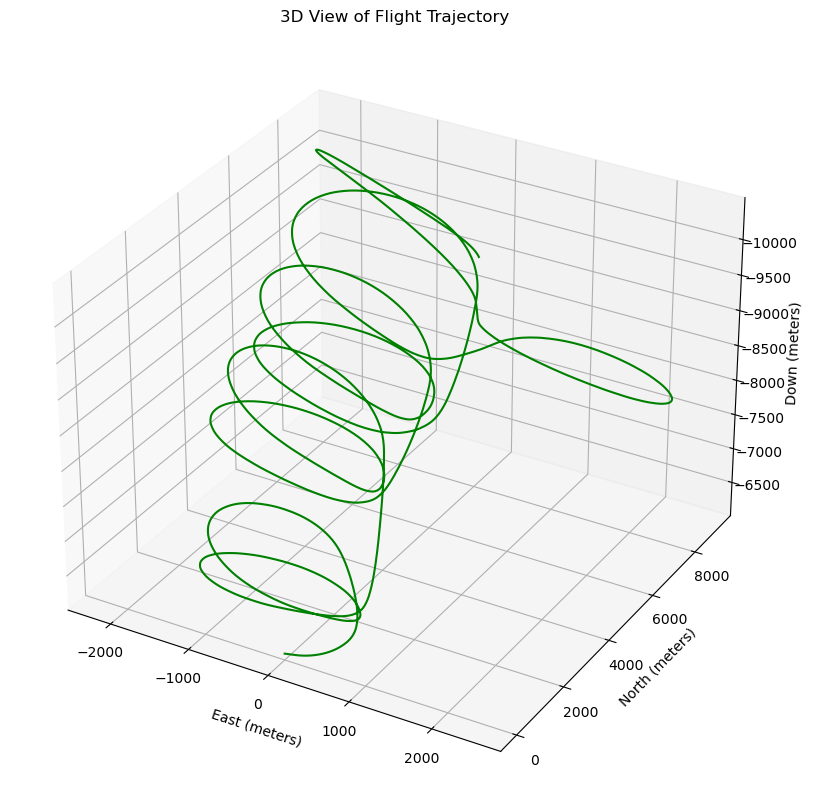

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to parse data from the file
def parse_data(lines):
    data = []
    for line in lines:
        if line.startswith('A'):
            parts = line.split(',T=')[1].split('|')
            # Assuming the format is longitude, latitude, altitude
            data.append([float(parts[1]), float(parts[0]), float(parts[2])])  # lat, lon, alt
    return pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Altitude'])

# Manual conversion of geodetic to NED coordinates
def manual_geodetic_to_ned(lat, lon, alt, lat_ref, lon_ref, alt_ref):
    # Convert degrees to radians
    lat = np.radians(lat)
    lon = np.radians(lon)
    lat_ref = np.radians(lat_ref)
    lon_ref = np.radians(lon_ref)

    # Differences
    dlat = lat - lat_ref
    dlon = lon - lon_ref

    # Earth's radius and flattening
    a = 6378137.0
    f = 1 / 298.257223563

    # Radius of curvature in the prime vertical
    sin_lat = np.sin(lat_ref)
    N = a / np.sqrt(1 - f * (2 - f) * sin_lat**2)

    # Cartesian offsets
    dNorth = dlat * (a * (1 - f)**2 + alt_ref)
    dEast = dlon * (N + alt_ref) * np.cos(lat_ref)
    dDown = -(alt - alt_ref)

    return dNorth, dEast, dDown

# Reading the file and parsing the data (NOTE: change the suffix .acmi to .txt)
with open('your_file_name.txt', 'r') as file:
    lines = file.readlines()
df = parse_data(lines)

# Applying the manual conversion to NED coordinates
df_ned = df.apply(
    lambda row: manual_geodetic_to_ned(row['Latitude'], row['Longitude'], row['Altitude'], 60, 120, 0),
    axis=1, result_type='expand'
)

# Rename columns to North, East, Down
df_ned.columns = ['North', 'East', 'Down']

# Plotting the 3D trajectory
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df_ned['East'], df_ned['North'], df_ned['Down'], color='green')

# Setting the labels and title
ax.set_xlabel('East (meters)')
ax.set_ylabel('North (meters)')
ax.set_zlabel('Down (meters)')
ax.set_title('3D View of Flight Trajectory')
ax.invert_zaxis()  # Inverting the Z axis for Down

plt.show()
